In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the given csv file

Lead_df = pd.read_csv("/Users/abhi/Documents/LEARNING/IIITB-DataSc/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv")
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Describing the data
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
# Getting df info and types
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Data shape
Lead_df.shape

(9240, 37)

Performing EDA

In [6]:
# Checking for discrepancies
print('Percentage of null values per column')
round(100*(Lead_df.isnull().sum()/len(Lead_df.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# Creating a copy of the original dateframe for operations

ops_df = Lead_df.copy()

In [8]:
# Dropping duplicate rows
ops_df=ops_df.drop_duplicates()

In [9]:
#Converting 'Select' values to NaN.

ops_df = ops_df.replace('Select', np.nan)

In [10]:
print('Percentage of null values per column')
round(100*(ops_df.isnull().sum()/len(ops_df.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Making list of of most NaN value (Taking a value >25 %)
notreqd_col = set((pd.isnull(ops_df).sum()/len(ops_df.index) > .25).index)

# Dropping columns since they have all unique values
notreqd_col = {'Prospect ID', 'Lead Number'}

# List of numerical columns
num_col = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# List of categorical columns
cat_col = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# List of Target/Output column
target_col = {'Converted'}

In [12]:
# Dropping columns
ops_df = ops_df[list(num_col | cat_col | target_col)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(ops_df.isnull().sum()/len(ops_df.index)),2)

Percentage of null values per column


Total Time Spent on Website                 0.00
Newspaper                                   0.00
Lead Origin                                 0.00
Receive More Updates About Our Courses      0.00
Digital Advertisement                       0.00
Do Not Call                                 0.00
Get updates on DM Content                   0.00
Lead Source                                 0.39
Update me on Supply Chain Content           0.00
A free copy of Mastering The Interview      0.00
Newspaper Article                           0.00
X Education Forums                          0.00
TotalVisits                                 1.48
I agree to pay the amount through cheque    0.00
Do Not Email                                0.00
Through Recommendations                     0.00
Converted                                   0.00
Search                                      0.00
Magazine                                    0.00
Page Views Per Visit                        1.48
Last Notable Activit

In [13]:
ops_df.shape

(9240, 22)

In [14]:
##Replacing NaN values

ops_df[['Page Views Per Visit']]=ops_df[['Page Views Per Visit']].fillna(value=2)

ops_df[['TotalVisits']]=ops_df[['TotalVisits']].fillna(value=7)

ops_df[['Last Activity']]=ops_df[['Last Activity']].fillna(value='Email Opened')

ops_df[['Lead Source']]=ops_df[['Lead Source']].fillna(value='Google')


In [15]:
# Getting % of NaN values in updated Dataframe
print('Percentage of null values per column')
round(100*(ops_df.isnull().sum()/len(ops_df.index)),2)

Percentage of null values per column


Total Time Spent on Website                 0.0
Newspaper                                   0.0
Lead Origin                                 0.0
Receive More Updates About Our Courses      0.0
Digital Advertisement                       0.0
Do Not Call                                 0.0
Get updates on DM Content                   0.0
Lead Source                                 0.0
Update me on Supply Chain Content           0.0
A free copy of Mastering The Interview      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
TotalVisits                                 0.0
I agree to pay the amount through cheque    0.0
Do Not Email                                0.0
Through Recommendations                     0.0
Converted                                   0.0
Search                                      0.0
Magazine                                    0.0
Page Views Per Visit                        0.0
Last Notable Activity                   

In [16]:
ops_df.shape

(9240, 22)

In [17]:
ops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Time Spent on Website               9240 non-null   int64  
 1   Newspaper                                 9240 non-null   object 
 2   Lead Origin                               9240 non-null   object 
 3   Receive More Updates About Our Courses    9240 non-null   object 
 4   Digital Advertisement                     9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Get updates on DM Content                 9240 non-null   object 
 7   Lead Source                               9240 non-null   object 
 8   Update me on Supply Chain Content         9240 non-null   object 
 9   A free copy of Mastering The Interview    9240 non-null   object 
 10  Newspaper Article                   

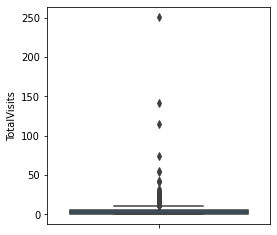

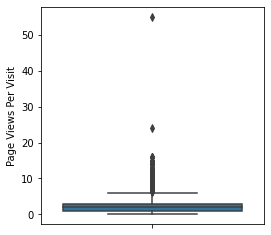

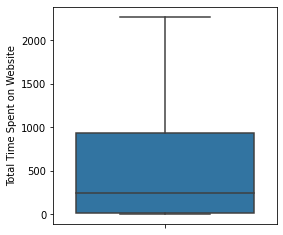

In [18]:
# Univariate Analysis of Numerical Columns
for c in num_col:
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=ops_df)
  plt.show()

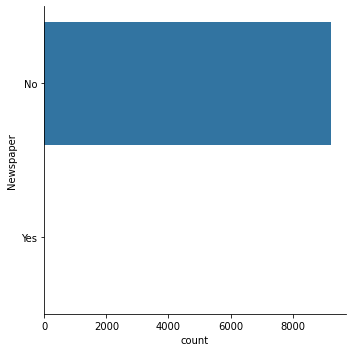

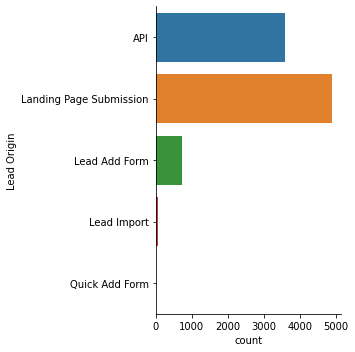

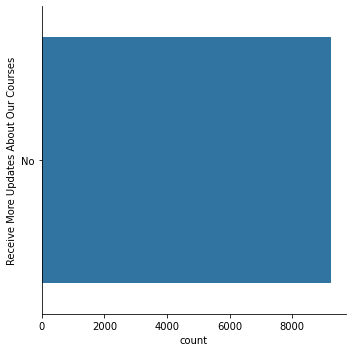

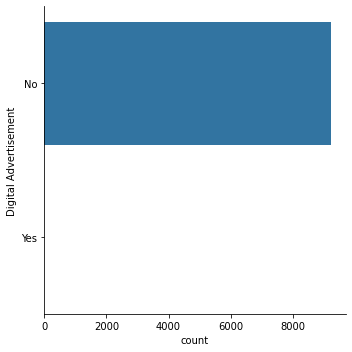

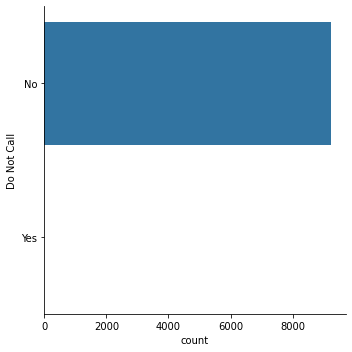

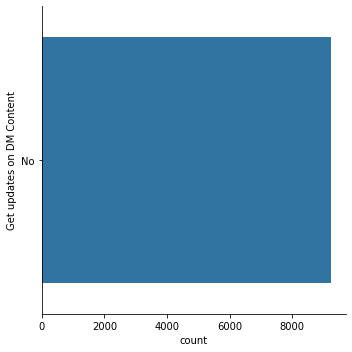

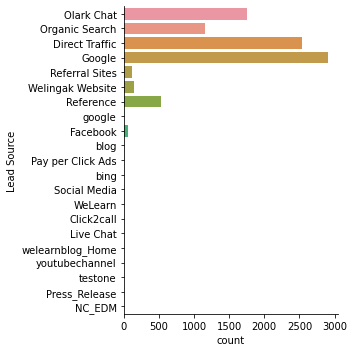

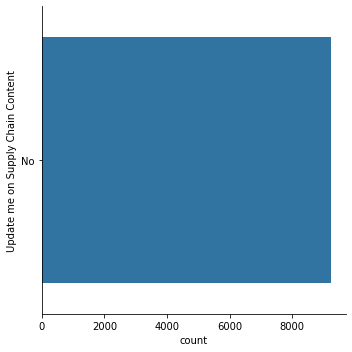

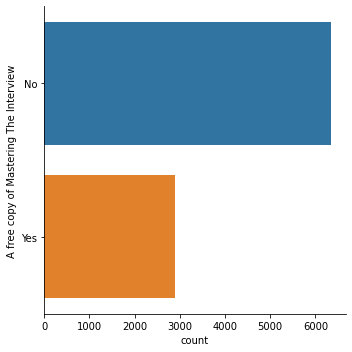

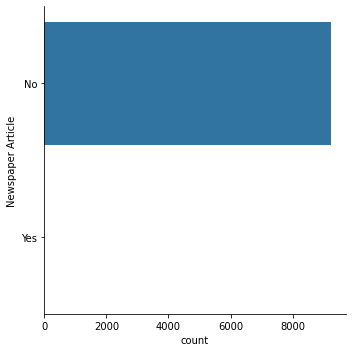

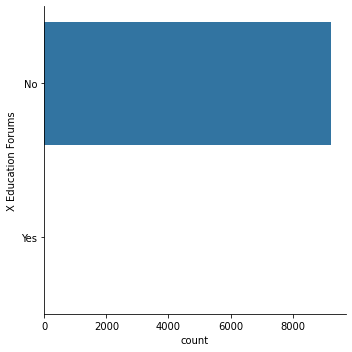

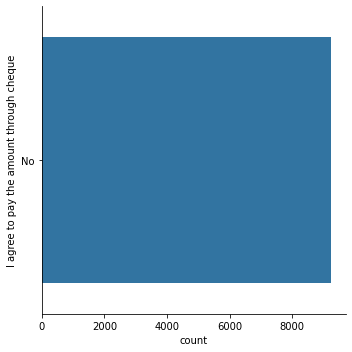

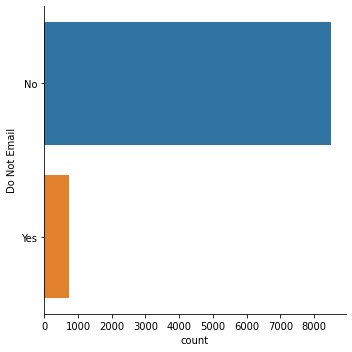

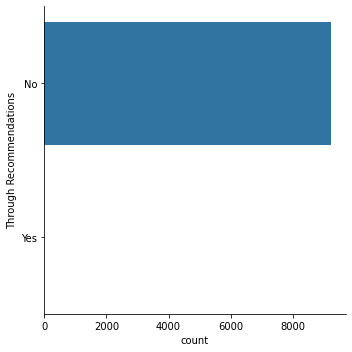

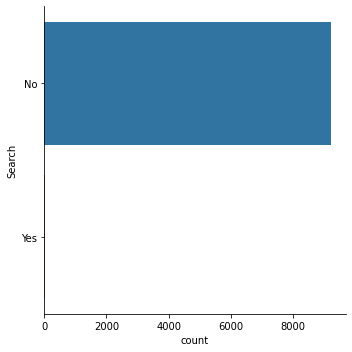

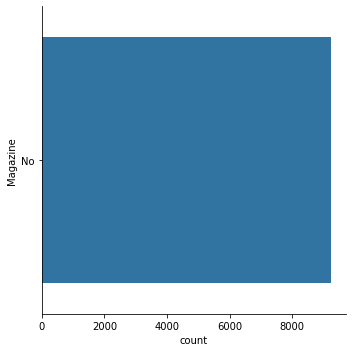

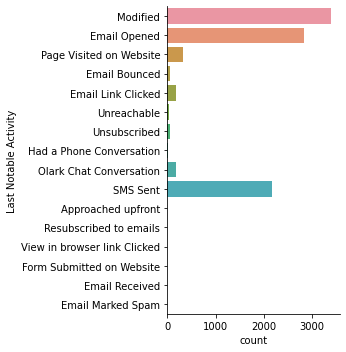

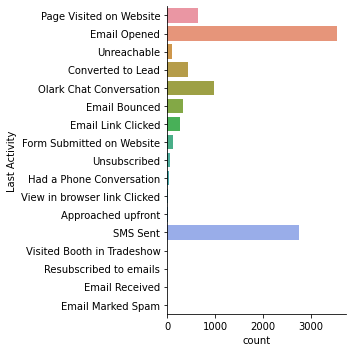

In [19]:
# Univariate Analysis of Cat Columns
for c in cat_col:
  sns.catplot(y=c, data=ops_df, kind="count")
  plt.show()

<Axes: >

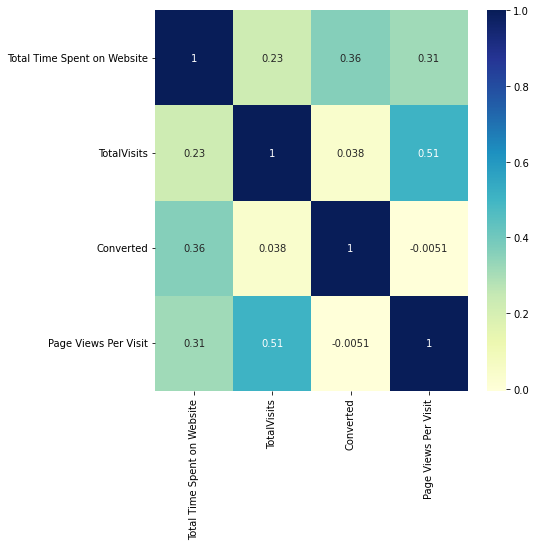

In [20]:
# Visualizing the correlation between all columns
plt.figure(figsize=(7, 7))
sns.heatmap(ops_df.corr(), cmap="YlGnBu",annot=True)

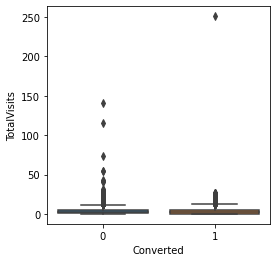

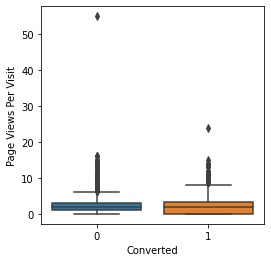

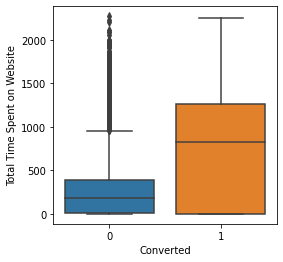

In [21]:
# Bivariate Analysis of Numerical Columns
for c in num_col:
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(x="Converted", y=c, data=ops_df)
    plt.show()

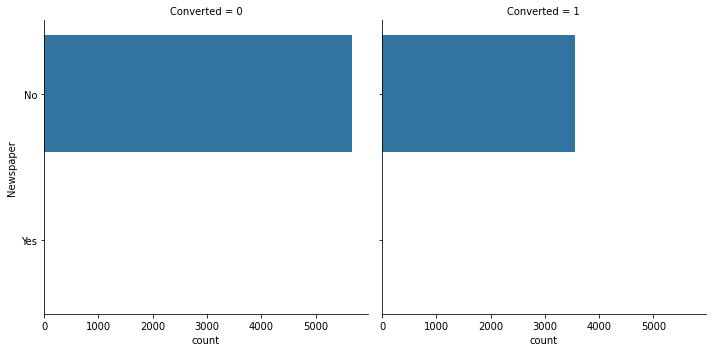

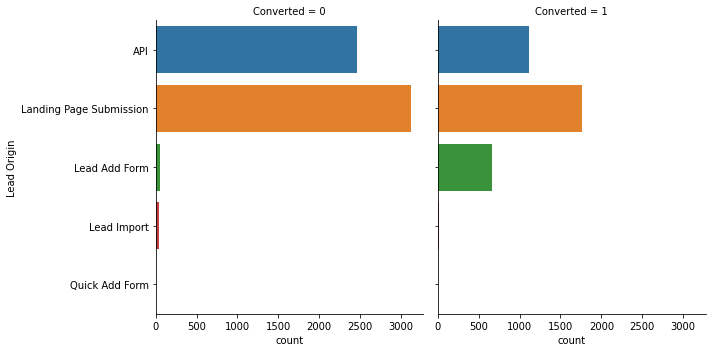

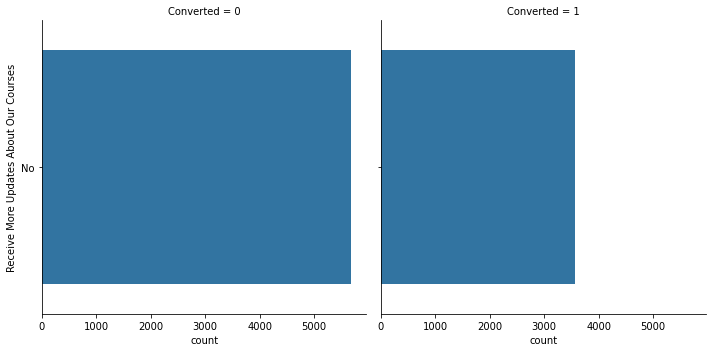

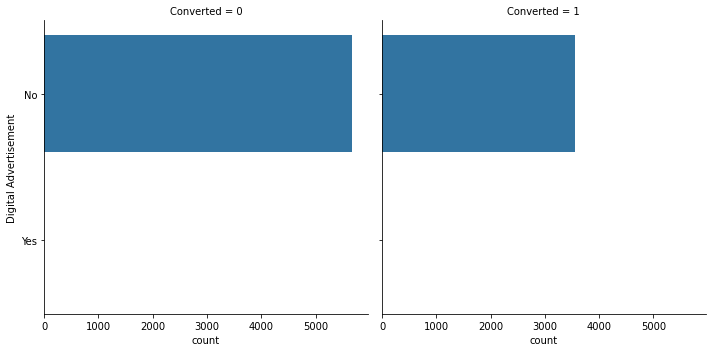

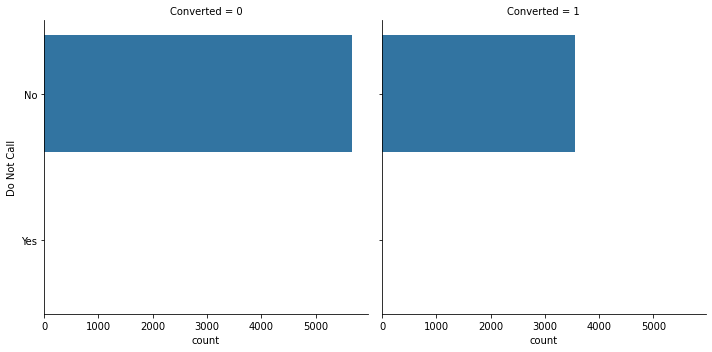

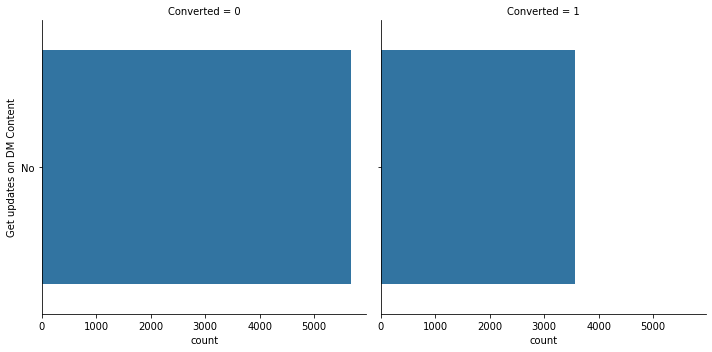

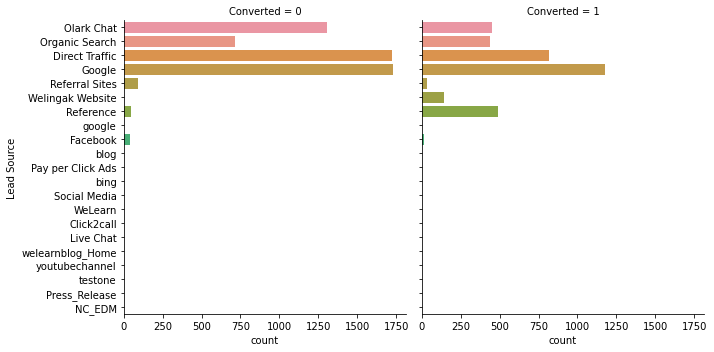

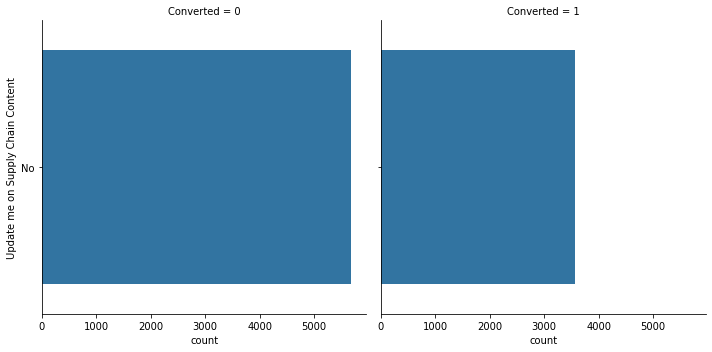

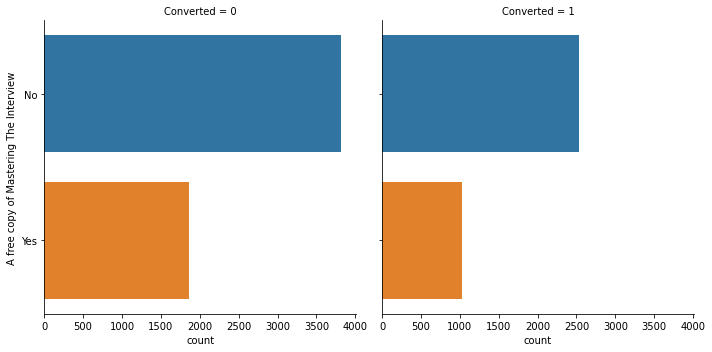

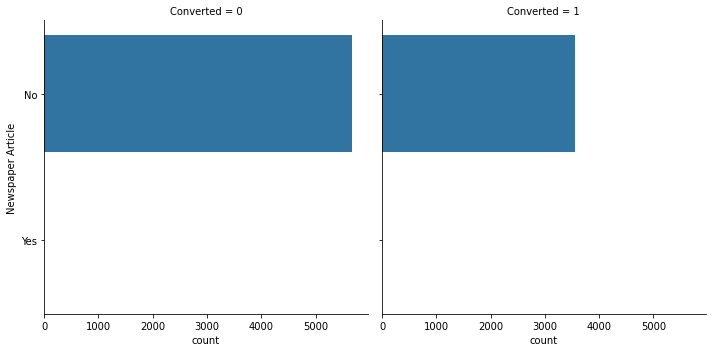

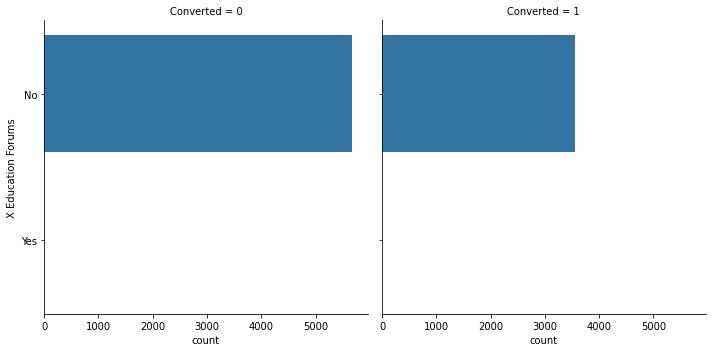

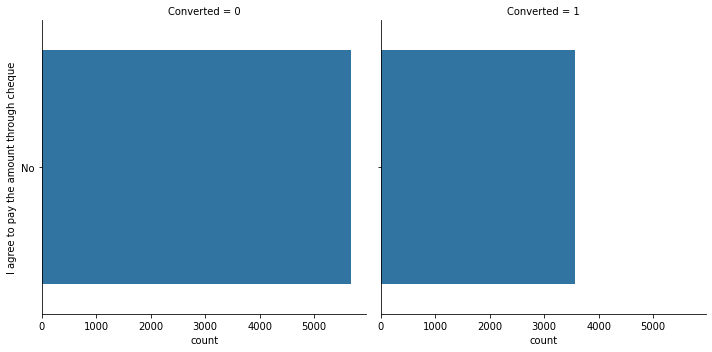

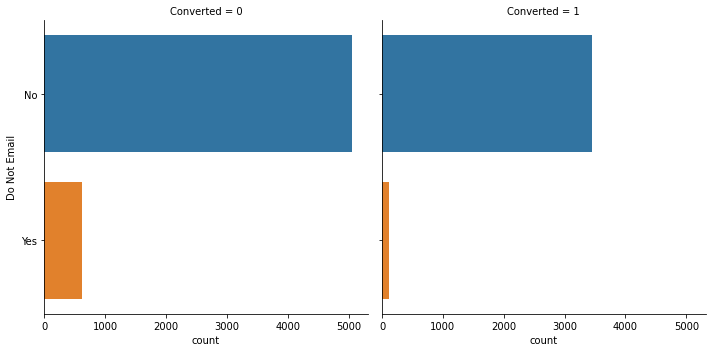

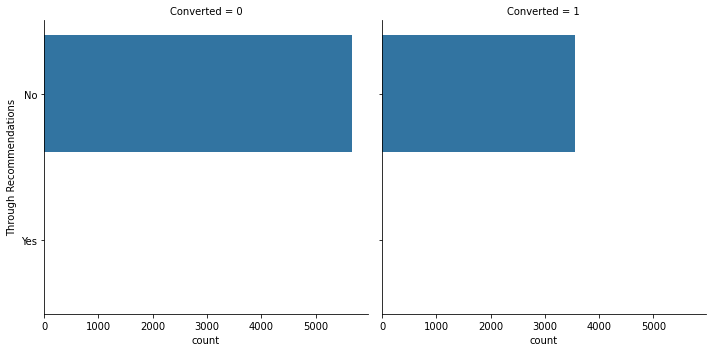

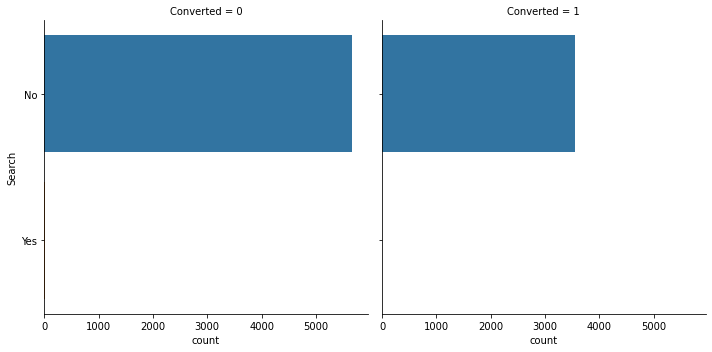

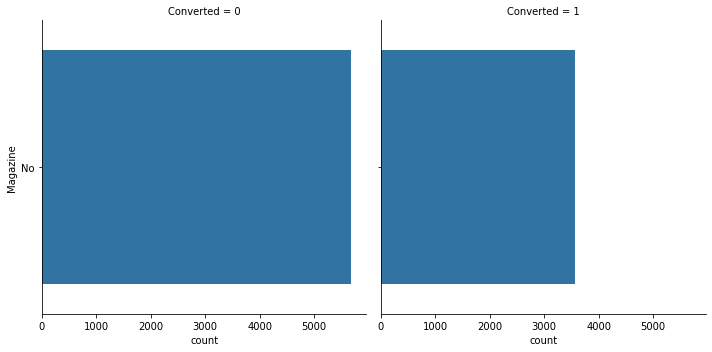

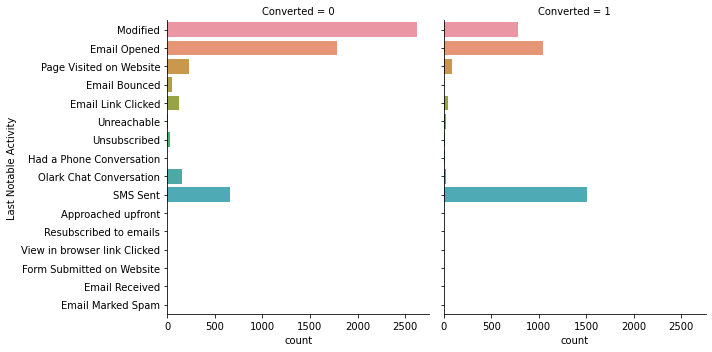

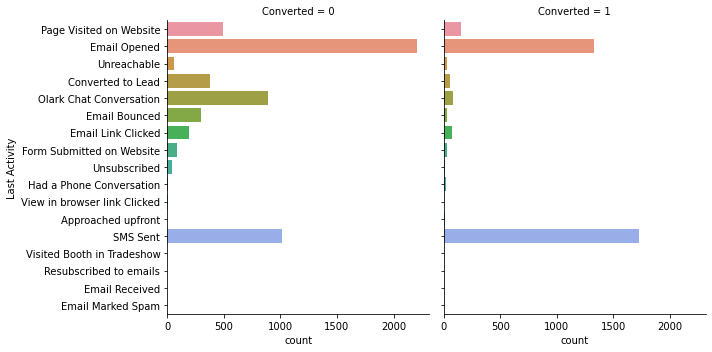

In [22]:
# Bivariate Analysis of Cat Columns
for c in cat_col:
  sns.catplot(col='Converted' ,y=c, data=ops_df, kind="count")
  plt.show()

<Axes: >

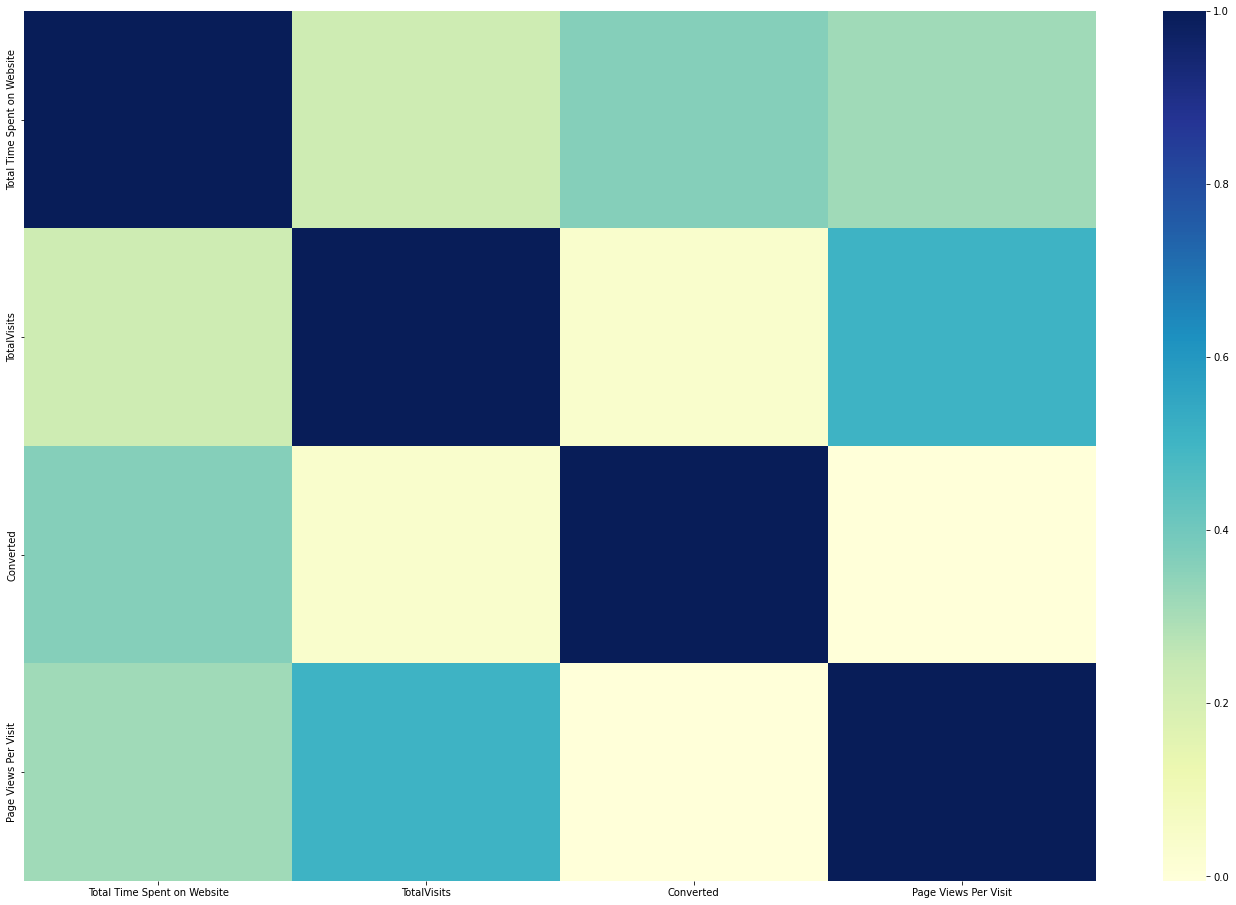

In [23]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(ops_df.corr(), cmap="YlGnBu")

In [24]:
# OUTLIERS

numericdf = ops_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numericdf.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.497944,487.698268,2.357440
std,4.837840,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


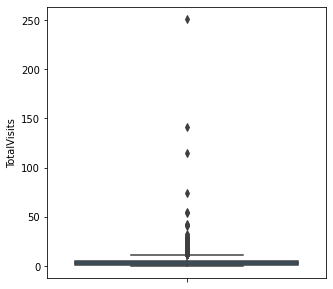

In [25]:
plt.figure(figsize = (5,5))
sns.boxplot(y=ops_df['TotalVisits'])
plt.show()

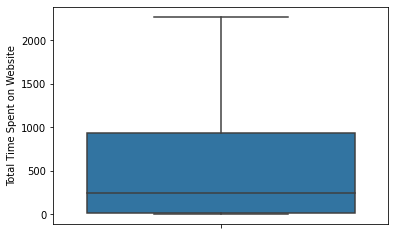

In [26]:
sns.boxplot(y=ops_df['Total Time Spent on Website'])
plt.show()


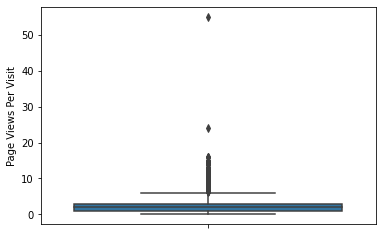

In [27]:
sns.boxplot(y=ops_df['Page Views Per Visit'])
plt.show()


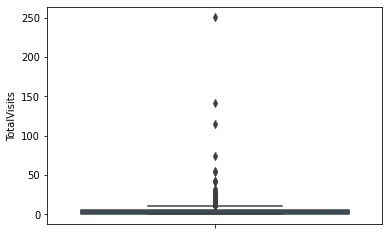

In [28]:
#Outlier Treatment: Remove 1% of values

Q3 = ops_df.TotalVisits.quantile(0.99)
Lead_data = ops_df[(ops_df.TotalVisits <= Q3)]
Q1 = ops_df.TotalVisits.quantile(0.01)
Lead_data_outlier = ops_df[(ops_df.TotalVisits >= Q1)]
sns.boxplot(y=Lead_data_outlier['TotalVisits'])
plt.show()

In [29]:
#getting a list of categorical columns again

cat_cols= Lead_data_outlier.select_dtypes(include=['object']).columns
cat_cols

Index(['Newspaper', 'Lead Origin', 'Receive More Updates About Our Courses',
       'Digital Advertisement', 'Do Not Call', 'Get updates on DM Content',
       'Lead Source', 'Update me on Supply Chain Content',
       'A free copy of Mastering The Interview', 'Newspaper Article',
       'X Education Forums', 'I agree to pay the amount through cheque',
       'Do Not Email', 'Through Recommendations', 'Search', 'Magazine',
       'Last Notable Activity', 'Last Activity'],
      dtype='object')

Dummy Variables

In [30]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_data_outlier[['Lead Origin' ,'Lead Source', 'Do Not Email', 'Last Activity','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_data_dum = pd.concat([Lead_data_outlier, dummy], axis=1)
Lead_data_dum

,Total Time Spent on Website,Newspaper,Lead Origin,Receive More Updates About Our Courses,Digital Advertisement,Do Not Call,Get updates on DM Content,Lead Source,Update me on Supply Chain Content,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,No,API,No,No,No,No,Olark Chat,No,No,...,0,0,1,0,0,0,0,0,0,0
1,674,No,API,No,No,No,No,Organic Search,No,No,...,0,0,0,0,0,0,0,0,0,0
2,1532,No,Landing Page Submission,No,No,No,No,Direct Traffic,No,Yes,...,0,0,0,0,0,0,0,0,0,0
3,305,No,Landing Page Submission,No,No,No,No,Direct Traffic,No,No,...,0,0,1,0,0,0,0,0,0,0
4,1428,No,Landing Page Submission,No,No,No,No,Google,No,No,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1845,No,Landing Page Submission,No,No,No,No,Direct Traffic,No,No,...,0,0,0,0,0,0,0,0,0,0
9236,238,No,Landing Page Submission,No,No,No,No,Direct Traffic,No,Yes,...,0,0,0,0,0,0,1,0,0,0
9237,199,No,Landing Page Submission,No,No,No,No,Direct Traffic,No,Yes,...,0,0,0,0,0,0,1,0,0,0
9238,499,No,Landing Page Submission,No,No,No,No,Google,No,No,...,0,0,0,0,0,0,1,0,0,0


In [31]:
Lead_data_dum = Lead_data_dum.drop(['Lead Source', 'Do Not Email', 'Magazine','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque','Do Not Call','Last Activity',\
                                     'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity',\
                                        'Receive More Updates About Our Courses','Lead Origin'], 1)
Lead_data_dum

,Total Time Spent on Website,TotalVisits,Converted,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,674,5.0,0,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1532,2.0,1,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,305,1.0,0,1.00,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1428,2.0,1,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1845,8.0,1,2.67,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,238,2.0,0,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,199,2.0,0,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,499,3.0,1,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


TEST TRAIN

In [32]:
# TEST TRAIN

TX = Lead_data_dum.drop(['Converted'], 1)
TX.head()

,Total Time Spent on Website,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,674,5.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1532,2.0,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,305,1.0,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1428,2.0,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Putting the target variable in TY
TY = Lead_data_dum['Converted']
TY.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Splitting the Data

In [34]:
# Splitting the data in 75% and 25% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(TX, TY, train_size=0.75, test_size=0.25, random_state=10)

In [35]:
# MinMax
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Total Time Spent on Website,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6191,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7013,0.600976,0.035857,0.125000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4100,0.103418,0.003984,0.041667,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7003,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3828,0.184199,0.059761,0.312500,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Logistic Regression

In [36]:
# LOGISTIC REGRESSION

lr = LogisticRegression()

In [37]:
# Running RFE
rfe = RFE(lr,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [38]:
# List that have been selected by RFE with ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('TotalVisits', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 21),
 ('Lead Source_Press_Release', False, 25),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 8),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 20),
 ('Lead Source_w

In [39]:

# Listing the top 25 columns that are selected in RFE
at_sel_predictors = X_train.columns[rfe.support_]
at_sel_predictors

Index(['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_google', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [40]:
# Putting all the columns selected by RFE in the variable 'col_rfe'
col_rfe = X_train.columns[rfe.support_]

In [41]:
# Selecting columns selected by RFE
X_train = X_train[col_rfe]


Model Building

In [42]:
# STATSMODEL
# --------MODEL 1
X_train_sm_model = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm_model, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6904
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3044.8
Date:                Mon, 14 Aug 2023   Deviance:                       6089.7
Time:                        09:57:36   Pearson chi2:                 7.04e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9696      0.174     -5.586      0.000      -1.310      -0.629
Total Time Spent on Website                        4.6256      0.154     29.956      0.000       4.323       4.928
TotalVisits                                        7.5801      2.257      3.359      0.001       3.157      12.003
Page Views Per Visit                              -1.6919      0.531     -3.186      0.001      -2.733      -0.651
Lead Origin_Lead Add Form                          3.8410      0.579      6.633      0.000       2.706       4.976
Lead Source_NC_EDM                                22.5253   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                             0.9411      0.113      8.357      0.000       0.720       1.162
Lead Source_Reference                              0.1888      0.603      0.313      0.754      -0.993       1.370
Lead Source_Social Media                           1.9474      1.427      1.365      0.172      -0.849       4.744
Lead Source_Welingak Website                       2.3583      1.160      2.032      0.042       0.084       4.633
Lead Source_bing                                 -20.5297   2.12e+04     -0.001      0.999   -4.17e+04    4.16e+04
Lead Source_google                               -21.6179    2.5e+04     -0.001      0.999   -4.91e+04     4.9e+04
Do Not Email_Yes                                  -1.5333      0.181     -8.466      0.000      -1.888      -1.178
Last Activity_Converted to Lead                   -0.7099      0.205     -3.461      0.001      -1.112      -0.308
Last Activity_Email Bounced                       -0.8996      0.352     -2.558      0.011      -1.589      -0.210
Last Activity_Form Submitted on Website           -0.3713      0.326     -1.139      0.255      -1.010       0.268
Last Activity_Olark Chat Conversation             -1.1797      0.185     -6.360      0.000      -1.543      -0.816
Last Activity_SMS Sent                             0.4284      0.143      2.998      0.003       0.148       0.708
Last Notable Activity_Email Link Clicked          -1.4976      0.286     -5.234      0.000      -2.058      -0.937
Last Notable Activity_Email Opened                -0.9890      0.162     -6.089      0.000      -1.307      -0.671
Last Notable Activity_Had a Phone Conversation     1.7933      1.122      1.598      0.110      -0.406       3.993
Last Notable Activity_Modified                    -1.4225      0.131    -10.849      0.000      -1.680      -1.166
Last Notable Activity_Olark Chat Conversation     -1.2051      0.358     -3.364      0.001      -1.907      -0.503
Last Notable Activity_Page Visited on Website     -1.4223      0.234     -6.075      0.000   

In [43]:
# VARIANCE INFLATION FACTOR

# Make a VIF dataframe for all the variables present
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df


,Features,VIF
3,Lead Origin_Lead Add Form,15.72
6,Lead Source_Reference,12.61
2,Page Views Per Visit,3.99
8,Lead Source_Welingak Website,3.85
20,Last Notable Activity_Modified,2.88
18,Last Notable Activity_Email Opened,2.36
5,Lead Source_Olark Chat,2.16
0,Total Time Spent on Website,2.14
16,Last Activity_SMS Sent,2.14
15,Last Activity_Olark Chat Conversation,2.07


In [44]:
# Dropping some columns
X_train.drop(['Last Notable Activity_Resubscribed to emails','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [45]:
# Refit the model with the new set of features
#---------MODEL 2
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3047.3
Date:                Mon, 14 Aug 2023   Deviance:                       6094.5
Time:                        09:57:37   Pearson chi2:                 7.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9064      0.171     -5.313      0.000      -1.241      -0.572
Total Time Spent on Website                       4.6234      0.154     29.961      0.000       4.321       4.926
TotalVisits                                       7.6758      2.260      3.397      0.001       3.247      12.104
Page Views Per Visit                             -1.7031      0.531     -3.207      0.001      -2.744      -0.662
Lead Origin_Lead Add Form                         3.8380      0.579      6.624      0.000       2.702       4.974
Lead Source_NC_EDM                               22.5237   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                            0.9398      0.113      8.351      0.000       0.719       1.160
Lead Source_Reference                             0.1902      0.603      0.315      0.753      -0.992       1.373
Lead Source_Social Media                          1.9378      1.426      1.359      0.174      -0.858       4.733
Lead Source_Welingak Website                      2.3654      1.161      2.038      0.042       0.091       4.640
Lead Source_bing                                -20.5344   2.12e+04     -0.001      0.999   -4.16e+04    4.16e+04
Lead Source_google                              -21.6257   2.49e+04     -0.001      0.999   -4.89e+04    4.88e+04
Do Not Email_Yes                                 -1.5468      0.181     -8.540      0.000      -1.902      -1.192
Last Activity_Converted to Lead                  -0.7285      0.205     -3.557      0.000      -1.130      -0.327
Last Activity_Email Bounced                      -0.9230      0.352     -2.625      0.009      -1.612      -0.234
Last Activity_Form Submitted on Website          -0.3898      0.326     -1.197      0.231      -1.028       0.249
Last Activity_Olark Chat Conversation            -1.1979      0.185     -6.471      0.000      -1.561      -0.835
Last Activity_SMS Sent                            0.3753      0.140      2.673      0.008       0.100       0.651
Last Notable Activity_Email Link Clicked         -1.5600      0.284     -5.484      0.000      -2.118      -1.002
Last Notable Activity_Email Opened               -1.0516      0.159     -6.595      0.000      -1.364      -0.739
Last Notable Activity_Modified                   -1.4663      0.130    -11.314      0.000      -1.720      -1.212
Last Notable Activity_Olark Chat Conversation    -1.2491      0.358     -3.492      0.000      -1.950      -0.548
Last Notable Activity_Page Visited on Website    -1.4862      0.232     -6.406      0.000      -1.941      -1.032
Last Notable Activity_Unreachable                 1.4683      0.638      2.303      0.021       0.219       2.718
=====

In [46]:
# Make a VIF dataframe for all the variables present again
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
3,Lead Origin_Lead Add Form,15.72
6,Lead Source_Reference,12.61
2,Page Views Per Visit,3.98
8,Lead Source_Welingak Website,3.85
19,Last Notable Activity_Modified,2.88
18,Last Notable Activity_Email Opened,2.35
5,Lead Source_Olark Chat,2.15
0,Total Time Spent on Website,2.13
16,Last Activity_SMS Sent,2.13
15,Last Activity_Olark Chat Conversation,2.07


In [47]:
# Dropping more columns

X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [48]:
# Refit the model with the new set of features
#---------MODEL 3
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6907
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3085.3
Date:                Mon, 14 Aug 2023   Deviance:                       6170.7
Time:                        09:57:37   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3591
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7530      0.168     -4.484      0.000      -1.082      -0.424
Total Time Spent on Website                       4.5095      0.152     29.623      0.000       4.211       4.808
TotalVisits                                       7.3716      2.235      3.298      0.001       2.991      11.752
Page Views Per Visit                             -2.2619      0.528     -4.286      0.000      -3.296      -1.227
Lead Source_NC_EDM                               22.4911   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                            0.8076      0.110      7.310      0.000       0.591       1.024
Lead Source_Reference                             3.8869      0.204     19.073      0.000       3.487       4.286
Lead Source_Social Media                          1.8906      1.425      1.327      0.185      -0.902       4.684
Lead Source_Welingak Website                      6.0443      1.013      5.968      0.000       4.059       8.029
Lead Source_bing                                -20.5934   2.12e+04     -0.001      0.999   -4.16e+04    4.16e+04
Lead Source_google                              -21.6344   2.51e+04     -0.001      0.999   -4.92e+04    4.92e+04
Do Not Email_Yes                                 -1.3900      0.175     -7.962      0.000      -1.732      -1.048
Last Activity_Converted to Lead                  -0.7892      0.203     -3.879      0.000      -1.188      -0.390
Last Activity_Email Bounced                      -0.9338      0.339     -2.753      0.006      -1.599      -0.269
Last Activity_Form Submitted on Website          -0.4099      0.323     -1.267      0.205      -1.044       0.224
Last Activity_Olark Chat Conversation            -1.2132      0.184     -6.580      0.000      -1.575      -0.852
Last Activity_SMS Sent                            0.3741      0.139      2.694      0.007       0.102       0.646
Last Notable Activity_Email Link Clicked         -1.5886      0.283     -5.613      0.000      -2.143      -1.034
Last Notable Activity_Email Opened               -1.0762      0.158     -6.820      0.000      -1.385      -0.767
Last Notable Activity_Modified                   -1.4757      0.128    -11.513      0.000      -1.727      -1.224
Last Notable Activity_Olark Chat Conversation    -1.2501      0.355     -3.517      0.000      -1.947      -0.554
Last Notable Activity_Page Visited on Website    -1.5065      0.229     -6.575      0.000      -1.956      -1.057
Last Notable Activity_Unreachable                 1.4063      0.632      2.227      0.026       0.168       2.644
=================================================================================================================
"""

In [49]:
# Make a VIF dataframe for all the variables present
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,Page Views Per Visit,3.96
18,Last Notable Activity_Modified,2.87
17,Last Notable Activity_Email Opened,2.33
4,Lead Source_Olark Chat,2.14
0,Total Time Spent on Website,2.13
15,Last Activity_SMS Sent,2.10
14,Last Activity_Olark Chat Conversation,2.07
1,TotalVisits,2.03
12,Last Activity_Email Bounced,1.82
10,Do Not Email_Yes,1.82


In [50]:
# Dropping more columns

X_train.drop(['Lead Source_google','Lead Source_bing','Lead Source_Social Media','Lead Source_NC_EDM'], axis = 1, inplace = True)

In [51]:
# Refit the model with the new set of features
#---------MODEL 4
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6911
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3088.5
Date:                Mon, 14 Aug 2023   Deviance:                       6177.1
Time:                        09:57:38   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3585
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7546      0.168     -4.495      0.000      -1.084      -0.426
Total Time Spent on Website                       4.5108      0.152     29.636      0.000       4.212       4.809
TotalVisits                                       7.3933      2.236      3.306      0.001       3.011      11.776
Page Views Per Visit                             -2.2777      0.528     -4.316      0.000      -3.312      -1.243
Lead Source_Olark Chat                            0.8051      0.110      7.291      0.000       0.589       1.021
Lead Source_Reference                             3.8866      0.204     19.073      0.000       3.487       4.286
Lead Source_Welingak Website                      6.0437      1.013      5.968      0.000       4.059       8.029
Do Not Email_Yes                                 -1.3907      0.175     -7.970      0.000      -1.733      -1.049
Last Activity_Converted to Lead                  -0.7908      0.203     -3.890      0.000      -1.189      -0.392
Last Activity_Email Bounced                      -0.9298      0.339     -2.741      0.006      -1.595      -0.265
Last Activity_Form Submitted on Website          -0.4055      0.323     -1.254      0.210      -1.039       0.228
Last Activity_Olark Chat Conversation            -1.1983      0.184     -6.513      0.000      -1.559      -0.838
Last Activity_SMS Sent                            0.3775      0.139      2.720      0.007       0.105       0.650
Last Notable Activity_Email Link Clicked         -1.5853      0.283     -5.602      0.000      -2.140      -1.031
Last Notable Activity_Email Opened               -1.0725      0.158     -6.801      0.000      -1.382      -0.763
Last Notable Activity_Modified                   -1.4772      0.128    -11.526      0.000      -1.728      -1.226
Last Notable Activity_Olark Chat Conversation    -1.2617      0.355     -3.552      0.000      -1.958      -0.566
Last Notable Activity_Page Visited on Website    -1.5041      0.229     -6.566      0.000      -1.953      -1.055
Last Notable Activity_Unreachable                 1.4097      0.632      2.232      0.026       0.172       2.648
=================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,Page Views Per Visit,3.96
14,Last Notable Activity_Modified,2.86
13,Last Notable Activity_Email Opened,2.33
3,Lead Source_Olark Chat,2.14
0,Total Time Spent on Website,2.13
11,Last Activity_SMS Sent,2.10
10,Last Activity_Olark Chat Conversation,2.07
1,TotalVisits,2.03
6,Do Not Email_Yes,1.82
8,Last Activity_Email Bounced,1.81


In [53]:
# CREATING PREDICTION

# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6191    0.067544
7013    0.612889
4100    0.015499
7003    0.605388
3828    0.158308
3793    0.154477
1892    0.513966
4976    0.346557
5867    0.177282
8867    0.610583
dtype: float64

In [54]:
# Reshaping as array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.06754397, 0.61288913, 0.01549945, 0.60538782, 0.15830802,
       0.15447709, 0.51396586, 0.34655738, 0.17728201, 0.61058301])

In [55]:
# Creating a Data frame with convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.067544
1,1,0.612889
2,0,0.015499
3,1,0.605388
4,0,0.158308


In [56]:
# Substituting 0 or 1 with the cut off as 0.4
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.067544,0
1,1,0.612889,1
2,0,0.015499,0
3,1,0.605388,1
4,0,0.158308,0


In [57]:
# CHECKING MODEL ACCURACY

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7961038961038961

ACCURACY IS AROUND 80% WHICH IS GOOD

In [58]:
# OPTIMISING CUT-OFF USING ROC CURVE

# ROC function
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

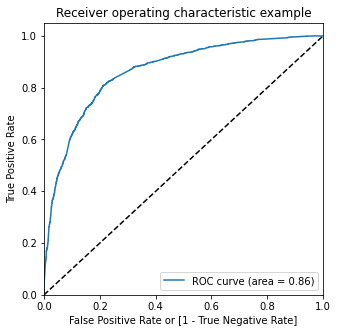

In [60]:
# Calling the ROC function
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

ROC CURVE AREA IS 0.86 AND IS A GOOD VALUE

In [61]:
# Creating columns with different probability cutoffs 
numbers_prob = [float(x)/10 for x in range(10)]
for i in numbers_prob:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067544,0,1,0,0,0,0,0,0,0,0,0
1,1,0.612889,1,1,1,1,1,1,1,1,0,0,0
2,0,0.015499,0,1,0,0,0,0,0,0,0,0,0
3,1,0.605388,1,1,1,1,1,1,1,1,0,0,0
4,0,0.158308,0,1,1,0,0,0,0,0,0,0,0


In [62]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.387590,1.000000,0.000000
0.1,0.1,0.564935,0.975056,0.305372
0.2,0.2,0.722078,0.899479,0.609802
0.3,0.3,0.789610,0.825763,0.766730
0.4,0.4,0.796104,0.769918,0.812677
0.5,0.5,0.796248,0.678332,0.870877
0.6,0.6,0.788023,0.598660,0.907870
0.7,0.7,0.761183,0.464631,0.948869
0.8,0.8,0.736941,0.372673,0.967484
0.9,0.9,0.677489,0.187267,0.987747


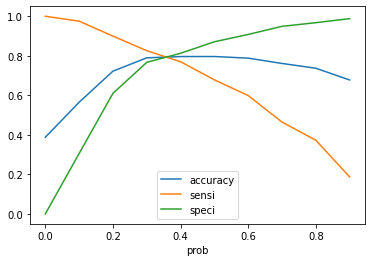

In [63]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

OPTIMAL CUTOFF SEEMS TO BE AROUND 0.36

In [64]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.067544,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.612889,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.015499,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.605388,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.158308,0,1,1,0,0,0,0,0,0,0,0,0


In [65]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7950937950937951

OVERALL ACCURACY FOR OUR MODEL IS AROUND 80%

Checking the Test Data

In [71]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [72]:
col = X_train.columns

In [74]:
# Marching the columns in X_train for X_test
X_test = X_test[col]

X_test_smo = sm.add_constant(X_test[col])
X_test_smo
X_test_smo

,const,Total Time Spent on Website,TotalVisits,Page Views Per Visit,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
567,1.0,0.147359,0.015936,0.166667,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2303,1.0,0.688859,0.007968,0.083333,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1523,1.0,0.596538,0.011952,0.125000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6923,1.0,0.083000,0.019920,0.208333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7841,1.0,0.311585,0.007968,0.083333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8893,1.0,0.035064,0.015936,0.166667,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8010,1.0,0.019530,0.007968,0.083333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2572,1.0,0.055038,0.019920,0.208333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [75]:
# Test set prediction is in the variable 'y_test_predict'
y_test_predict = res.predict(X_test_smo)
# Coverting to dataframe
y_pred_df = pd.DataFrame(y_test_predict)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.193998
1,0,0.488452
2,0,0.660915
3,0,0.144304
4,0,0.365274


In [76]:
# Making prediction using cut off 0.36
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.193998,0
1,0,0.488452,1
2,0,0.660915,1
3,0,0.144304,0
4,0,0.365274,1
...,...,...,...
2305,1,0.259372,0
2306,0,0.028368,0
2307,0,0.133547,0
2308,0,0.090234,0


In [77]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8038961038961039

Overall accuracy is around 80% which mathces the target